[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


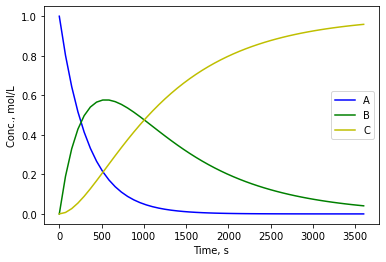

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint # to solve ODE numerically

# The process: A -> B, k1; B -> C, k2
def model(y, t):
    A = y[0] # unpack variables
    B = y[1]
    C = y[2]
    dAdt = -k1*A # calculate derivatives
    dBdt = k1*A-k2*B
    dCdt = k2*B
    return [dAdt, dBdt, dCdt] # return derivatives


# Parameters
k1 = 3e-3 # L/(mol s)
k2 = 1e-3 # L/(mol s)

A0 = 1 # mol/L
B0 = 0 # mol/L
C0 = 0 # mol/L
# Time span
t = np.linspace(0, 3600) # 0 - 1200s
# Initial conditions
ic = [A0, B0, C0]


# Integrate numerically ODEs
results = odeint(model, ic, t)

# Unpack concentrations
A = results[:,0]
B = results[:,1]
C = results[:,2]

# moles balance:
print(A+B+C) # should be A0

# Plot the results
plt.plot(t, A, 'b-', label = 'A')
plt.plot(t, B, 'g-', label = 'B')
plt.plot(t, C, 'y-', label = 'C')
plt.ylabel('Conc., mol/L')
plt.xlabel('Time, s')
plt.legend()


### ODEs for chemical kinetics - Code Snippets

In [ ]:
# concentrations after 60s of the reaction:
t0=0  #s
t1=60 #s
results = odeint(model, ic, [t0,t1])
A,B,C=results[1,:]
print("[A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(A, B, C))


[A]=0.8353 mol/L, [B]=0.1597 mol/L, [C]=0.0050 mol/L


In [67]:
# concentrations after 60s and 120s of the reaction:
t0=0  #s  - initial conditions
t1=60 #s
t2=120 #s

results = odeint(model, ic, [t0,t1,t2]) # study anatomy of results array
A0,B0,C0=results[0,:]
A1,B1,C1=results[1,:]
A2,B2,C2=results[2,:]

print("t=0s [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(A0, B0, C0))
print("t=60s [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(A1, B1, C1))
print("t=120s [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(A2, B2, C2))


t=0s [A]=1.0000 mol/L, [B]=0.0000 mol/L, [C]=0.0000 mol/L
t=60s [A]=0.8353 mol/L, [B]=0.1597 mol/L, [C]=0.0050 mol/L
t=120s [A]=0.6977 mol/L, [B]=0.2839 mol/L, [C]=0.0185 mol/L


In [39]:
# reaction time after which the concentration of A is 0.5 mol/L

Ax = 0.5 
t0=0  # initial conditions
eps = 0.001 # precision ---- try other values

t_range = np.linspace(0,3600,1000) # 1000 steps
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if np.abs(A-Ax) < eps:
        print("For t={:.2f}s => [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))


For t=230.63s => [A]=0.5006 mol/L, [B]=0.4401 mol/L, [C]=0.0593 mol/L


In [43]:
# reaction time after which the concentration of A is equal to concentration of B

t0=0  # initial conditions
eps = 0.005 # precision ---- try other values

t_range = np.linspace(0,3600,1000) # 1000 steps
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if np.abs(A-B) < eps:
        print("For t={:.2f}s => [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))


For t=255.86s => [A]=0.4641 mol/L, [B]=0.4652 mol/L, [C]=0.0707 mol/L


In [45]:
# reaction time after which the concentration of B is equal to concentration of C

t0=0  # initial conditions
eps = 0.001 # precision ---- try other values

t_range = np.linspace(0,3600,1000) # 1000 steps
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if np.abs(B-C) < eps:
        print("For t={:.2f}s => [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))


For t=0.00s => [A]=1.0000 mol/L, [B]=0.0000 mol/L, [C]=0.0000 mol/L
For t=1005.41s => [A]=0.0490 mol/L, [B]=0.4754 mol/L, [C]=0.4756 mol/L


In [65]:
# reaction time after which the concentration of B is maximal

t0=0  # initial conditions

# Approach no 1

Bmax = 0
tmax = 0

t_range = np.linspace(0,3600,1000) # 1000 steps <--- try other values
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if B > Bmax:
        Bmax = B
        tmax = t1
print("[Approach 1] For t={:.2f}s => [B]max={:.4f} mol/L".format(tmax, Bmax))



# Approach no 2:

from scipy.optimize import minimize_scalar

def objective_function(t):
    results = odeint(model, ic, [t0,t])
    A,B,C=results[1,:]
    return -B # minimize -[B] == maximize [B]

#print(minimize_scalar(objective_function,  method='bounded', bounds=(0, 3600)))
res = minimize_scalar(objective_function,  method='bounded', bounds=(0, 3600))
tmax = res.x
Bmax = -res.fun
print("[Approach 2] For t={:.2f}s => [B]max={:.4f} mol/L".format(tmax, Bmax))

[Approach 1] For t=547.75s => [B]max=0.5773 mol/L
[Approach 2] For t=549.31s => [B]max=0.5774 mol/L
